In [1]:
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
import ligo.skymap.plot
from matplotlib import pyplot as plt

import healpy as hp
from matplotlib.colors import TwoSlopeNorm
from astropy.coordinates import SkyCoord
import pickle

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectra_sim_sourc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     34   1R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPECTRUM      1 BinTableHDU    117   41R x 8C   [1I, 1E, 1E, 1E, 1I, 1I, 1E, 1E]   


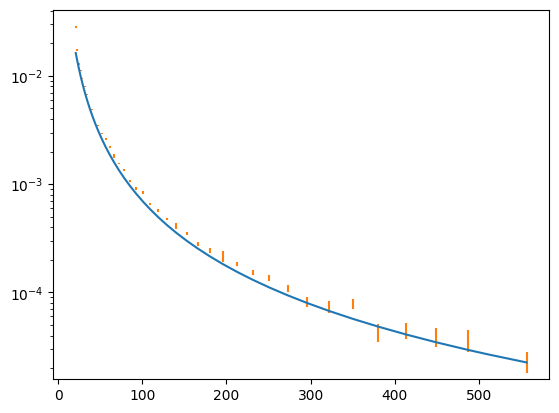

In [2]:
spectrum = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectra_sim_sourc.fits'
normal_E_Bins = [20.0, 21.5, 23.5, 25.5, 27.5, 30.0, 32.5, 35.5, 38.5, 42.0, 45.5, 49.5, 54.0, 58.5, 63.5, 69.0, 75.0, 81.5, 89.0, 96.5, 105.0, 114.0, 124.0, 134.5, 146.0, 159.0, 172.5, 187.5, 204.0, 221.5, 240.5, 261.5, 284.0, 308.5, 335.5, 364.5, 396.0, 430.0, 467.5, 508.0, 514, 600]
energies = np.array([(i+j)/2 for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
bin_widths = np.array([j-i for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])


with fits.open(spectrum) as hdul:
    hdul.info()
    data = hdul[2].data
data

def powerlaw(x, K, index, piv):
    return K * (x/piv)**index

flux = data['DFLUX'] * bin_widths

#plt.scatter(energies, data['RATE'])
plt.errorbar(energies, data['DFLUX'], yerr=data['DFLUX_ERR'], c='tab:orange', linestyle='None')
plt.plot(energies, powerlaw(energies, 7e-4, -2.0, 100.0))
#plt.plot(energies, powerlaw(energies, 7e-2, -2.0, 100.0))
#plt.scatter(energies, flux, c='tab:green')
#plt.xscale('log')
plt.yscale('log')


In [9]:
energies

array([ 20.75,  22.5 ,  24.5 ,  26.5 ,  28.75,  31.25,  34.  ,  37.  ,
        40.25,  43.75,  47.5 ,  51.75,  56.25,  61.  ,  66.25,  72.  ,
        78.25,  85.25,  92.75, 100.75, 109.5 , 119.  , 129.25, 140.25,
       152.5 , 165.75, 180.  , 195.75, 212.75, 231.  , 251.  , 272.75,
       296.25, 322.  , 350.  , 380.25, 413.  , 448.75, 487.75, 511.  ,
       557.  ])

In [10]:
result = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/results.spimodfit.fits'

with fits.open(result) as hdul:
    hdul.info()
    data = hdul[21].data
    t = Table(data)

t

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/results.spimodfit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     29   42R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPI.-EBDS-SET    1 BinTableHDU     63   41R x 3C   [1J, 1E, 1E]   
  3  SPI.-DFIT-RES_1    1 BinTableHDU    122   137R x 33C   [30A, 1J, 1J, 30A, 1I, 1D, 1D, 1D, 1D, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  4  SPI.-DFIT-RES_2    1 BinTableHDU    122   137R x 33C   [30A, 1J, 1J, 30A, 1I, 1D, 1D, 1D, 1D, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  5  SPI.-DFIT-RES_3    1 BinTableHDU    122   137R x 33C   [30A, 1J, 1J, 30A, 1I, 1D, 1D, 1D, 1D, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  6  SPI.-DFIT-

CONF_LIM  [%] Confidence level for profile errors                                [astropy.io.fits.card]


PAR_ID,COMP_NUM,COMP_BIN,PAR_TYPE,PAR_FIT,TSTART,TSTOP,TSTART_PTG,TSTOP_PTG,DET_MIN,DET_MAX,SPL_DEGREE,MIN_VALUES,MAX_VALUES,FLUX_REF,ENERGY_COR,FIT_VALUES_ML,FIT_ERRORS_ML,FLUX_ML,FLUX_ERR_ML,FIT_CLEVEL_MIN,FIT_CLEVEL_MAX,FIT_COV_ML,COUNTS_ML,CSTAT_GRAD_ML,STEP_MCMC,FIT_VALUES_MCMC,FIT_ERRORS_MCMC,FLUX_MCMC,FLUX_ERR_MCMC,FIT_COV_MCMC,COUNTS_MCMC,CSTAT_GRAD_MCMC
str30,int32,int32,str30,int16,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
sim_sourc,1,1,Point source,1,2135.2520391666667,2137.7974269981073,2135.2520391666667,2137.7974269981073,0,18,0,-1000000.0,1000000.0,1.0,0.075,0.09214279209364631,0.002937966485805225,0.006910709407023473,0.00022034748643539185,nan,nan,8.631647071714703e-06,69210.67157931963,-2.2821747141368864e-05,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,1,Background model,1,2135.2520391666667,2135.260557685185,2135.2520391666667,2135.291722883317,0,18,0,-8000000.0,8000000.0,1.0,1.0,1.4177654997623637,0.9428194612378803,1.4177654997623637,0.9428194612378803,nan,nan,6.91518380819067e-05,2280.7090467049156,-5.406685935349653e-06,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,2,Background model,1,2135.260557685185,2135.293150277778,2135.260557685185,2135.3240407251647,0,18,0,-8000000.0,8000000.0,1.0,1.0,1.3340180602911464,0.44573498060755007,1.3340180602911464,0.44573498060755007,nan,nan,8.050344790862113e-05,9789.264924873649,-1.9782606874158004e-06,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,3,Background model,1,2135.293150277778,2135.3254650925924,2135.293150277778,2135.3563160307904,0,18,0,-8000000.0,8000000.0,1.0,1.0,0.9176949283123217,0.44532539486219336,0.9176949283123217,0.44532539486219336,nan,nan,-7.440489807962642e-06,6682.961075760707,3.7854258918557093e-06,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,4,Background model,1,2135.3254650925924,2135.358057685185,2135.3254650925924,2135.3885297749794,0,18,0,-8000000.0,8000000.0,1.0,1.0,2.263284017372327,0.4483752656842786,2.263284017372327,0.4483752656842786,nan,nan,-0.00012754648108673236,16466.35040073516,4.301745082702091e-06,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,5,Background model,1,2135.358057685185,2135.389909537037,2135.358057685185,2135.420778061946,0,18,0,-8000000.0,8000000.0,1.0,1.0,2.399505929428165,0.4474369065394427,2.399505929428165,0.4474369065394427,nan,nan,-6.734992664250272e-05,17236.58510286626,6.883382208666688e-07,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,6,Background model,1,2135.389909537037,2135.422131759259,2135.389909537037,2135.4530923111793,0,18,0,-8000000.0,8000000.0,1.0,1.0,2.3670773349077967,0.4444020689768092,2.3670773349077967,0.4444020689768092,nan,nan,-4.5455017773190876e-05,17229.89950333174,6.680216340093637e-07,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,7,Background model,1,2135.422131759259,2135.454446574074,2135.422131759259,2135.4853493518517,0,18,0,-8000000.0,8000000.0,1.0,1.0,1.7855355723219781,0.44534731825131463,1.7855355723219781,0.44534731825131463,nan,nan,3.94373754179175e-05,13020.53864721038,-1.5160616529952264e-05,nan,nan,nan,nan,nan,nan,nan,nan
Back_model_01,2,8,Background model,1,2135.454446574074,2135.486772962963,2135.454446574074,2135.5177257286396,0,18,0,-8000000.0,8000000.0,1.0,1.0,1.5147692266649706,0.4436934468364699,1.5147692266649706,0.4436934468364699,nan,nan,-1.8955608927390032e-05,11027.752122558006,-2.387714955309761e-06,nan,nan,nan,nan,nan,nan,nan,nan
